# Dataset Collection
In this notebook, I will be collecting the data to train my Unet model on.

In [1]:
# basic imports
import os
import glob
import obspy
import numpy as np
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt

# more specific imports
from obspy import read
from os.path import exists
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from IPython.display import Markdown as md
from IPython.display import Image, display
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
# defining constants
SECONDS_IN_A_DAY = 60 * 60 * 24
TWELVE_DAY_TIMEFRAME = SECONDS_IN_A_DAY * 12
filepath = 'Spectrograms/LargerView/'
startingTime = UTCDateTime('2016-10-18T00:00:00') # this is a relatively arbitrary start time
# 2016-01-16T00:00:00.00
# '2014-11-22T00:00:00'

In [3]:
# define values for the data query
client = Client('IRIS')
net = 'XH'
sta = 'DR02'
chan = 'LHN'
loc = '--'

In [4]:
def plot_specgram(folder, st, name):    
    # copy the stream 
    st_mpl = st.copy()

    # remove-response
    st_mpl = st_mpl.remove_response(output="VEL", plot=False)

    ### Plot figures axes 
    fig = plt.figure(frameon=False)
    ax1 = fig.add_axes([0.1, 0.1, 3, 0.8])
    ax = plt.gca()
    
    # ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    # fig.add_axes(ax)
    
    # Format plot attributes 
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")


    # setting the title of the image
    """title = str(starttime) + ' - ' + str(endtime) + ": " + net + '.' + sta + '.' + loc + '.' + chan
    plt.title(title) """
    # no title to get a clean image for processing     

    power, freqs, time, im = plt.specgram(st_mpl[0].data, axes=ax1 ,Fs = 1, NFFT=512*2, 
                                          mode='psd', scale='dB', cmap='magma',
                                          scale_by_freq=True, noverlap = 1000) 

#     ax1.set_ylim(0.03, 0.13)
    ax1.set_ylim(0.05, 0.33)
    
    # setting the color bar     
    # cbar = plt.colorbar(im)
    # cbar.set_label("Power (dB re 1 (m/s)^2/Hz)")
    mappable = ax1.images[0]

    # plt.colorbar(mappable=mappable, cax = ax2)
    mappable.set_clim(-180, 0)

    # save figure
    plt.savefig(folder + name + '.png',  bbox_inches='tight', pad_inches=0);


FDSNNoDataException: No data available for request.
HTTP Status code: 204
Detailed response of server:



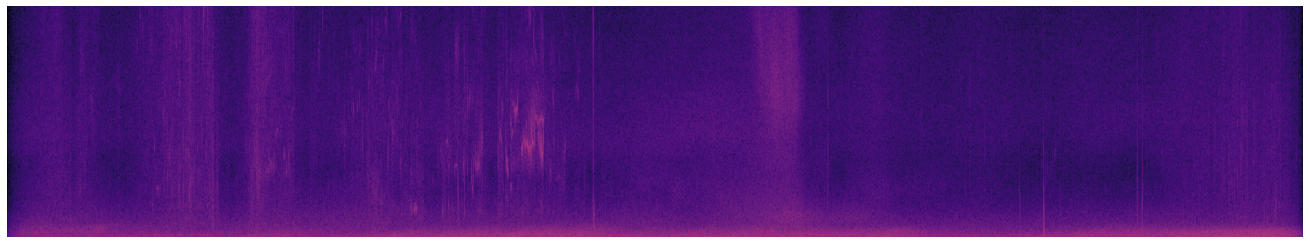

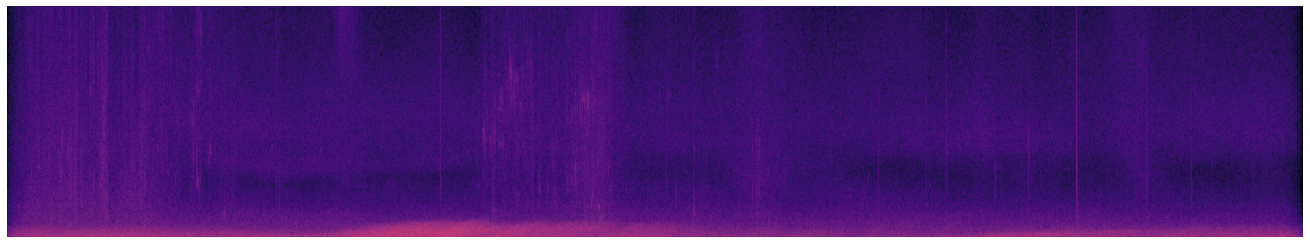

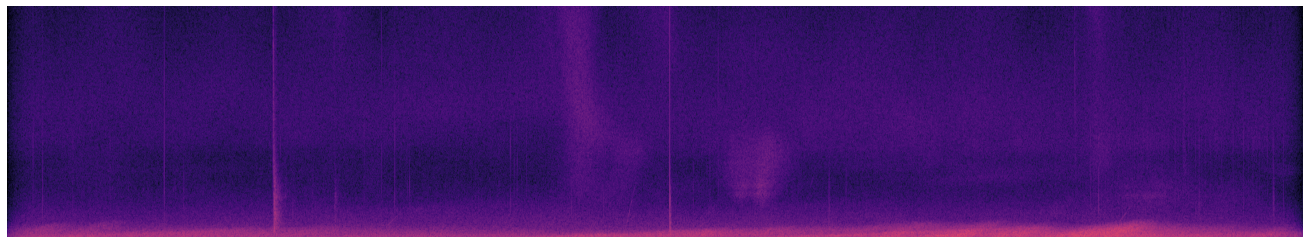

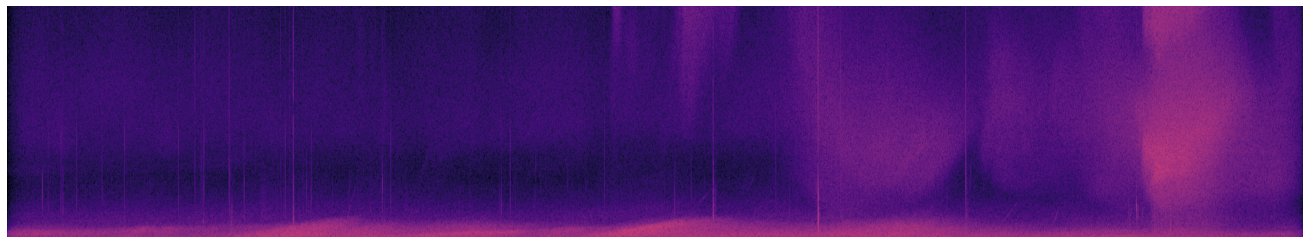

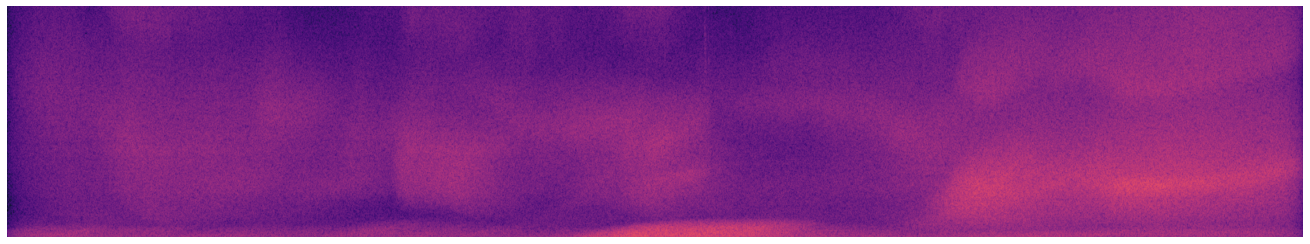

In [5]:
# download and save 60 spectrograms
for i in range(60):
    starttime = startingTime + (i * TWELVE_DAY_TIMEFRAME)
    endtime = starttime + TWELVE_DAY_TIMEFRAME
    
    st = client.get_waveforms(net, sta, loc, chan, starttime, endtime, attach_response = True)

    filename = net + '.' + sta + '.' + loc + '.' + chan + ": " + str(starttime) + "-" + str(endtime)
    
    plot_specgram(filepath, st, filename)